<a href="https://colab.research.google.com/github/payal500/practice-series-/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#step1 :data cleaning part
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#checking for null values
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
#droping null column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#rename the cloumn name
df.rename(columns={'v1':'output','v2':'input_data'},inplace=True)

In [ ]:
df.sample(3)

,output,input_data
1034,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
3938,ham,Y Ì_ wan to go there? C doctor?
989,ham,Ugh. Gotta drive back to sd from la. My butt i...


In [ ]:
#convert output spam and ham into 0,1 using encoding method
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['output']=lb.fit_transform(df['output'])

In [ ]:
df.tail()

,output,input_data
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [ ]:
df['output'].value_counts()

,count
output,
0,4825
1,747


In [ ]:
#checking null value
df.isnull().sum()

,0
output,0
input_data,0


In [ ]:
#check duplicate
df['input_data'].duplicated().sum()

403

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5169, 2)

# EDA

In [ ]:
#check if data is balance or imbalance
df['output'].value_counts()

,count
output,
0,4516
1,653


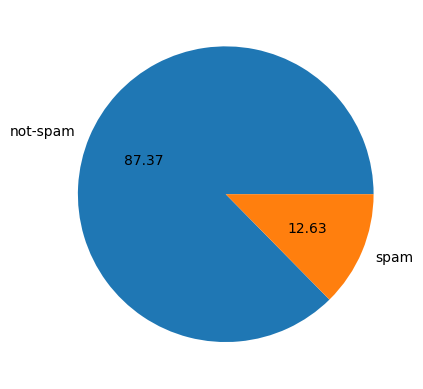

In [ ]:
#plot the graph of spam or not spam data
import matplotlib.pyplot as plt
plt.pie(df['output'].value_counts(),labels=['not-spam','spam'], autopct='%0.2f')
plt.show()

In [ ]:
#checking how many alphabets , words are there by using nltk= means natural language tool kit
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#we use apply lenght to check the total charater in one sentence
df['num_character']=df['input_data'].apply(len)

In [ ]:
df.head()

,output,input_data,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#use lambda function and take word tokenize to check the words in sentence
df['input_data'].apply(lambda x: nltk.word_tokenize(x))

,input_data
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [ ]:
#we take len of word count
df['num_word']=df['input_data'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
#checking the total sentence in one row
df['input_data'].apply( lambda x: nltk.sent_tokenize(x))

,input_data
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will Ì_ b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [ ]:
df['count_sentecne']=df['input_data'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,output,input_data,num_character,num_word,count_sentecne
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
import seaborn as sns

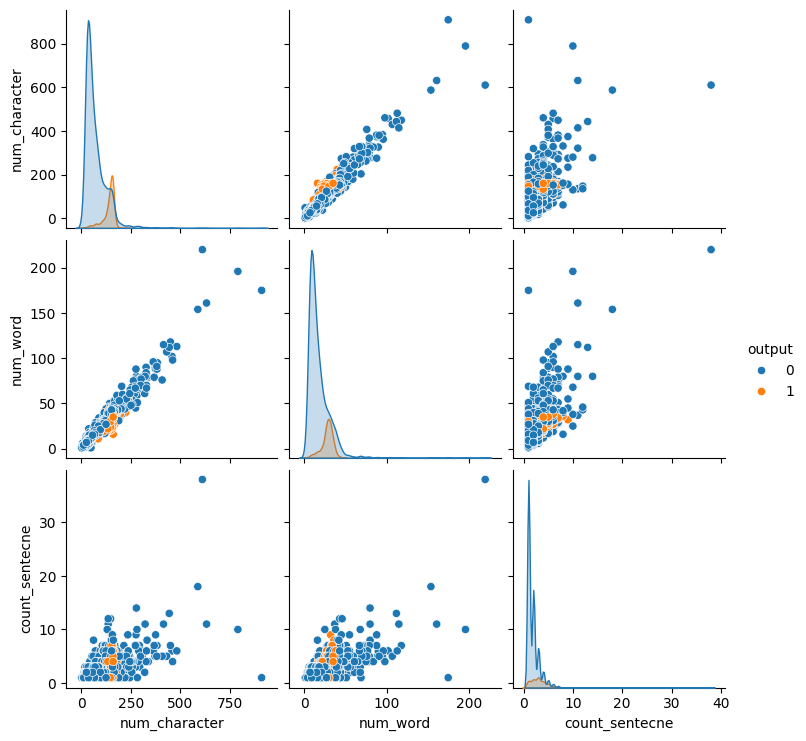

In [ ]:
sns.pairplot(df, hue='output')

In [ ]:
df.columns

Index(['output', 'input_data', 'num_character', 'num_word', 'count_sentecne'], dtype='object')

In [ ]:
df1=df[['output', 'num_character', 'num_word', 'count_sentecne']].corr()

<Axes: >

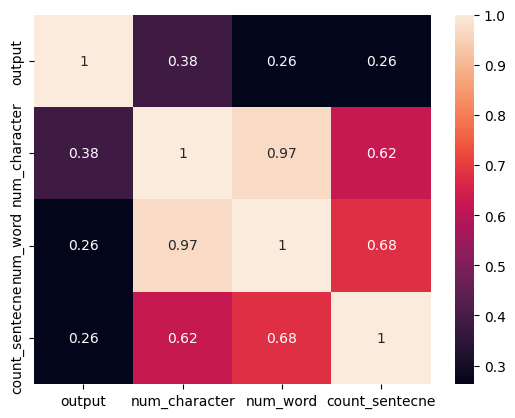

In [ ]:
#we are checking the correlation btw features and target value more the value towards 1 it is high coorelated
#0.97 in feature charater and word count means both feature are highly corelated means multicollinarity we use one feature from 3 features
sns.heatmap(df1,annot=True)

# Data preprocessing

1. lowe case- we convert all data into lowercase
2. tokenization- divide all sentence into small word
3. removing special character- ,.-+# this are all special character
4. remove stop wards and punctuation- ex- is,am,are,the,i,was that type of word that are not helpul/meaningful/need
5. stemming- ex- dance,dancing,danced all are taken/convert as dance   

In [ ]:
#import all necessary library
import nltk
# import stopwords that check all the is,am,are,the not imp character
from nltk.corpus import stopwords
stopwords.words('english')
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#importing string where we have punctuation librabry that check all !,@# marks
import string

#importing streming to check ex-dance,dancing,danced to convert into danc
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
#practical view

def transform_function(x):
  #converting all data to lower case
  x=x.lower()
  # converting/tokenize string into words
  x=nltk.word_tokenize(x)
  #creating loop for check isalnum(alphabetic numeric alue)
  y=[]
  for i in x:
    if i.isalnum():
      y.append(i)
  x=y[:]
  #clearing y list so we can append again
  y.clear()
  #creating loop for checking stopwords and punctuation
  for i in x:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  x=y[:]
  y.clear()
  # cretaed loop for checking stremming data
  for i in x:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
#sample test
transform_function('who is available from sd team ?? dancing pls connect to me as soon as poosible!! thanks!')

'avail sd team danc pl connect soon poosibl thank'

In [ ]:
#usimg tranform function into input data
df['input_data1']=df['input_data'].apply(transform_function)

In [ ]:
df.head()

,output,input_data,num_character,num_word,count_sentecne,input_data1
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['output']==1]['input_data1'].str.cat(sep=" "))

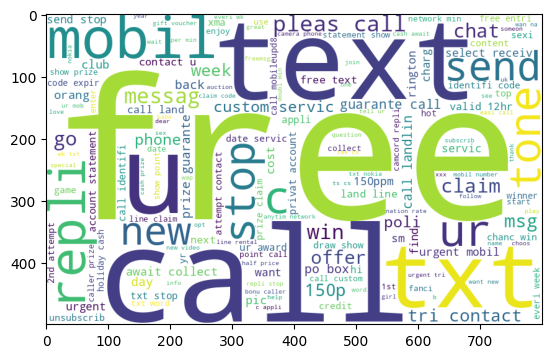

In [ ]:
#creating wordcloud to better visualize the spam words more repated value is highligted bigger
plt.imshow(spam_wc)

In [ ]:
not_spam_wc=wc.generate(df[df['output']==0]['input_data1'].str.cat(sep=" "))

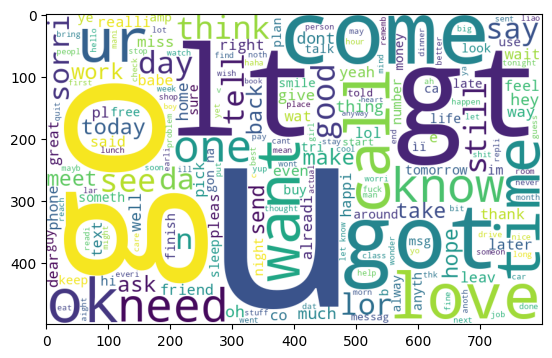

In [ ]:
plt.imshow(not_spam_wc)

In [ ]:
#visulaizing through bar chart top 30 notspam
ham_wordcount=[]
#looping output 0 as not spam and iputdata
for i in df[df['output']==0]['input_data1'].tolist():
  for j in i.split():
    ham_wordcount.append(j)



In [ ]:
#imported counter to count total no of occurance
from collections import Counter
pd.DataFrame(Counter(ham_wordcount).most_common(10))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


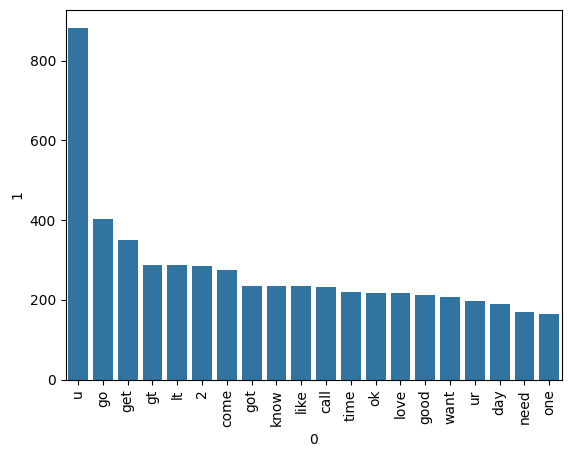

In [ ]:
import seaborn as sns
sns.barplot(x=pd.DataFrame(Counter(ham_wordcount).most_common(20))[0],y=pd.DataFrame(Counter(ham_wordcount).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

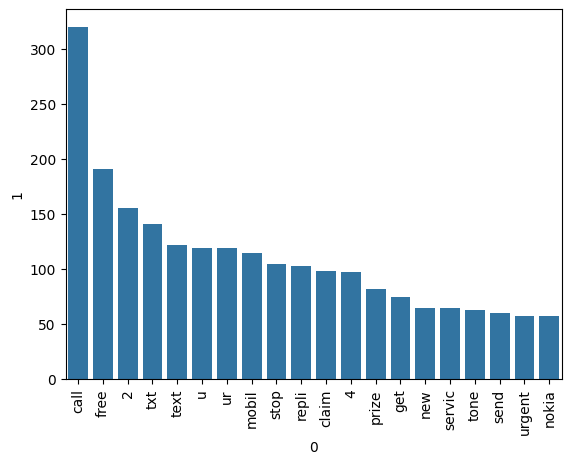

In [ ]:
#ploted barchart for top most 30 spam words
spam_wordcount=[]
for i in df[df['output']==1]['input_data1'].tolist():
  for j in i.split():
    spam_wordcount.append(j)

import seaborn as sns
sns.barplot(x=pd.DataFrame(Counter(spam_wordcount).most_common(20))[0],y=pd.DataFrame(Counter(spam_wordcount).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfid=TfidfVectorizer(max_features=3000)

In [ ]:
x=cv.fit_transform(df['input_data1']).toarray()
x1=Tfid.fit_transform(df['input_data1']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(5169, 6708)

In [ ]:
x1.shape

(5169, 3000)

In [ ]:
y=df['output'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
gnb.fit(x1_train,y1_train)
y1_pred1=gnb.predict(x1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
bnb.fit(x1_train,y1_train)
y2_pred2=bnb.predict(x1_test)
print(accuracy_score(y1_test,y2_pred2))
print(confusion_matrix(y1_test,y2_pred2))
print(precision_score(y1_test,y2_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
mnb.fit(x1_train,y1_train)
y3_pred3=mnb.predict(x1_test)
print(accuracy_score(y1_test,y3_pred3))
print(confusion_matrix(y1_test,y3_pred3))
print(precision_score(y1_test,y3_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))\




0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x1_train,y1_train,x1_test,y1_test):
    clf.fit(x1_train,y1_train)
    y_pred = clf.predict(x1_test)
    accuracy = accuracy_score(y1_test,y_pred)
    precision = precision_score(y1_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x1_train,y1_train,x1_test,y1_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x1_train,y1_train,x1_test,y1_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [110]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [111]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [107]:

voting.fit(x1_train,y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [108]:
y_pred = voting.predict(x1_test)
print("Accuracy",accuracy_score(y1_test,y_pred))
print("Precision",precision_score(y1_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [112]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(x1_train,y1_train)
y_pred = clf.predict(x1_test)
print("Accuracy",accuracy_score(y1_test,y_pred))
print("Precision",precision_score(y1_test,y_pred))

In [ ]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))